In [1]:
import missingno as msno
import seaborn as sns
import numpy as np
import pandas as pd
import plotly.plotly as py

sns.set()

In [2]:
df = pd.read_csv('elsec15.csv')

/usr/local/lib/python3.4/dist-packages/IPython/core/interactiveshell.py:2698: DtypeWarning:

Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.



In [3]:
df.shape

(14376, 141)

In [4]:
df.head()

,STATE,IDCENSUS,NAME,CONUM,CSA,CBSA,SCHLEV,NCESID,YRDATA,V33,...,V32,_19H,_21F,_31F,_41F,_61V,_66V,W01,W31,W61
0,1,1500100100000,AUTAUGA COUNTY SCHOOL DISTRICT,1001,N,33860,3,0100240,15,9664,...,0,49431,16603,2992,63042,0,0,2094,372,8617
1,1,1500200100000,BALDWIN COUNTY SCHOOL DISTRICT,1003,380,19300,3,0100270,15,30596,...,0,337160,99087,13027,423220,0,0,5784,50441,71370
2,1,1500300100000,BARBOUR COUNTY SCHOOL DISTRICT,1005,N,N,3,0100300,15,925,...,0,8024,0,304,7720,0,0,0,0,646
3,1,1500300200000,EUFAULA CITY SCHOOL DISTRICT,1005,N,N,3,0101410,15,2829,...,0,0,0,0,0,0,0,0,2054,7478
4,1,1500400100000,BIBB COUNTY SCHOOL DISTRICT,1007,142,13820,3,0100360,15,3357,...,0,22155,0,1190,20965,0,0,1397,790,5400


In [5]:
df.describe()

,STATE,IDCENSUS,CONUM,SCHLEV,YRDATA,V33,TOTALREV,TFEDREV,C14,C15,...,V32,_19H,_21F,_31F,_41F,_61V,_66V,W01,W31,W61
count,14376.000000,1.437600e+04,14376.000000,14376.000000,14376.0,14376.000000,1.437600e+04,1.437600e+04,14376.000000,14376.000000,...,14376.000000,1.437600e+04,1.437600e+04,14376.000000,1.437600e+04,14376.000000,14376.000000,14376.000000,14376.000000,1.437600e+04
mean,26.801336,2.728090e+13,29838.158598,2.883139,15.0,3374.682526,4.546951e+04,3.708038e+03,915.914858,752.781093,...,7.318656,2.871850e+04,4.831726e+03,3936.853158,2.957606e+04,487.162354,553.761547,1335.636825,3710.651920,9.091542e+03
std,13.894331,1.389514e+13,14753.492121,1.271649,0.0,14419.737037,2.590623e+05,2.021328e+04,5972.748111,3619.184513,...,122.649299,1.841763e+05,2.652979e+04,20071.591744,1.894224e+05,3555.988118,6968.740454,10651.097318,20183.852905,3.261580e+04
min,1.000000,1.500100e+12,1001.000000,1.000000,15.0,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,15.000000,1.550327e+13,18063.000000,3.000000,15.0,305.000000,5.241500e+03,2.920000e+02,54.000000,0.000000,...,0.000000,8.400000e+01,0.000000e+00,5.000000,7.150000e+01,0.000000,0.000000,0.000000,0.000000,8.350000e+02
50%,27.000000,2.750320e+13,30063.000000,3.000000,15.0,979.500000,1.402300e+04,8.470000e+02,180.000000,118.000000,...,0.000000,4.034000e+03,0.000000e+00,410.000000,4.143500e+03,0.000000,0.000000,0.000000,0.000000,2.708500e+03
75%,38.000000,3.850053e+13,41009.000000,3.000000,15.0,2744.250000,3.791375e+04,2.433500e+03,545.250000,532.000000,...,0.000000,1.866350e+04,3.030000e+02,1845.000000,1.912600e+04,0.000000,0.000000,491.000000,626.250000,7.567500e+03
max,51.000000,5.150230e+13,56045.000000,7.000000,15.0,995192.000000,2.543738e+07,1.307783e+06,379531.000000,248209.000000,...,7753.000000,1.372802e+07,1.312286e+06,731854.000000,1.447108e+07,173300.000000,700000.000000,869643.000000,885058.000000,2.355662e+06


BEGIN Understanding Section Here

In [6]:
df1 = df.replace(0, float("NAN"))

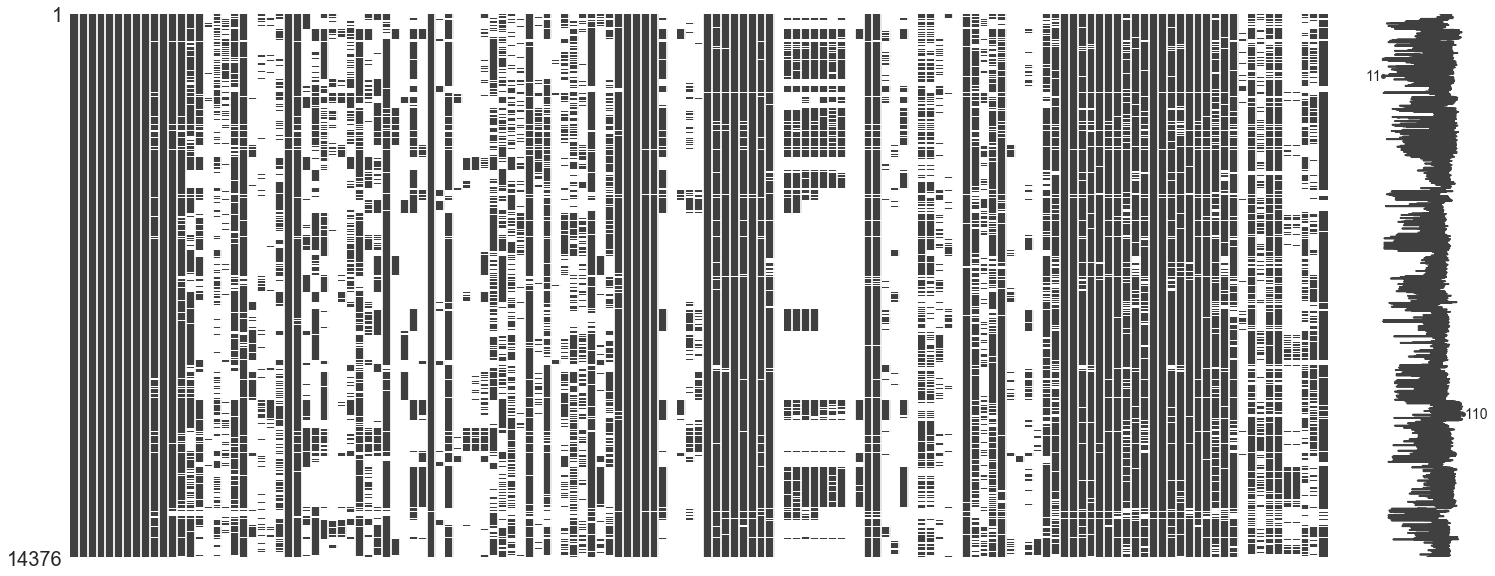

In [7]:
msno.matrix(df1)

In [8]:
df1 = df1.dropna(axis=1,thresh=8000, how='all')
df1.shape

(14376, 73)

In [9]:
df1 = df.replace("N", float("NAN"))

In [10]:
df1 = df1.dropna(axis=0,thresh=140, how='all')
df1.shape

(10546, 141)

END UNDERSTANDING SECTION

Begin Cleaning the Data

In [11]:
df.head()

,STATE,IDCENSUS,NAME,CONUM,CSA,CBSA,SCHLEV,NCESID,YRDATA,V33,...,V32,_19H,_21F,_31F,_41F,_61V,_66V,W01,W31,W61
0,1,1500100100000,AUTAUGA COUNTY SCHOOL DISTRICT,1001,N,33860,3,0100240,15,9664,...,0,49431,16603,2992,63042,0,0,2094,372,8617
1,1,1500200100000,BALDWIN COUNTY SCHOOL DISTRICT,1003,380,19300,3,0100270,15,30596,...,0,337160,99087,13027,423220,0,0,5784,50441,71370
2,1,1500300100000,BARBOUR COUNTY SCHOOL DISTRICT,1005,N,N,3,0100300,15,925,...,0,8024,0,304,7720,0,0,0,0,646
3,1,1500300200000,EUFAULA CITY SCHOOL DISTRICT,1005,N,N,3,0101410,15,2829,...,0,0,0,0,0,0,0,0,2054,7478
4,1,1500400100000,BIBB COUNTY SCHOOL DISTRICT,1007,142,13820,3,0100360,15,3357,...,0,22155,0,1190,20965,0,0,1397,790,5400


In [33]:
State_Dict = {1: 'AL', 2: 'AK', 3: 'AZ', 4: 'AR', 5: 'CA', 6: 'CO', 7: 'CT', 8: 'DE', 9: 'DC', 10: 'FL', 11: 'GA', 12: 'HA', 13: 'ID', 14: 'IL', 15: 'IN', 16: 'IA', 17: 'KS', 18: 'KY', 19: 'LA', 20: 'ME', 21: 'MD', 22: 'MA', 23: 'MI', 24: 'MN', 25: 'MS', 26: 'MO', 27: 'MT', 28: 'NE', 29: 'NV', 30: 'NH', 31: 'NJ', 32: 'NM', 33: 'NY', 34: 'NC', 35: 'ND', 36: 'OH', 37: 'OK', 38: 'OR', 39: 'PA', 40: 'RI', 41: 'SC', 42: 'SD', 43: 'TN', 44: 'TX', 45: 'UT', 46: 'VT', 47: 'VA', 48: 'WA', 49: 'WV', 50: 'WI', 51: 'WY'}
State_Rows = []
for key in State_Dict:
    mydict = {"State": State_Dict[key], "Count": (df["STATE"] == key).sum()}
    State_Rows.append(mydict)
States = pd.DataFrame(State_Rows)

   Count State
0    134    AL
1     53    AK
2    237    AZ
3    251    AR
4   1057    CA


In [43]:
# GENERATES OUR NUMBER OF SCHOOLS PER STATE CHART
# from plotly.graph_objs import *

# scl = [[0.0, 'rgb(252,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
#             [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]
# data = [ dict(
#         type='choropleth',
#         colorscale = scl,
#         autocolorscale = False,
#         locations = States['State'],
#         z = States['Count'].astype(float),
#         locationmode = 'USA-states',
#         marker = dict(
#             line = dict (
#                 color = 'rgb(255,255,255)',
#                 width = 2
#             ) ),
#         colorbar = dict(
#             title = "Number of Schools")
#         ) ]
# layout = Layout(
#     autosize=False,
#     geo=dict(
#         countrycolor='rgb(102, 102, 102)',
#         countrywidth=0.1,
#         lakecolor='rgb(255, 255, 255)',
#         landcolor='rgba(237, 247, 138, 0.28)',
#         lonaxis=dict(
#             gridwidth=1.5999999999999999,
#             range=[-180, -50],
#             showgrid=False
#         ),
#         projection=dict(
#             type='albers usa'
#         ),
#         scope='usa',
#         showland=True,
#         showrivers=False,
#         showsubunits=True,
#         subunitcolor='rgb(102, 102, 102)',
#         subunitwidth=0.5
#     ),
#     hovermode='closest',
#     images=list([
#         dict(
#             x=1,
#             y=0.6,
#             sizex=0.155,
#             sizey=0.4,
#             source='http://i.imgur.com/Xe3f1zg.png',
#             xanchor='right',
#             xref='paper',
#             yanchor='bottom',
#             yref='paper'
#         )
#     ]),
#     showlegend=True,
#     title='<b>Number of Schools per State</b>',
#     width= 800,
#     margin = dict(
#         l=0,
#         r=50,
#         b=100,
#         t=100,
#         pad=4)
# )
# fig = Figure(data=data, layout=layout)
# py.iplot(fig, filename='DSD_1')